Exploratory Data ANalysis & Intro

Goal
1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

Final Deliverables:
- Create Jupyter Notebooks (showcasing core skills in Python)
- Create a summary page (via README.md) capturing your findings.
- Share this project via GitHub & Linkedln

In [50]:
# Importing Libraries
import pandas as pd 
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Filter for Mexico Data Analyst roles

In [51]:
df_DA_Mex = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Mexico')]


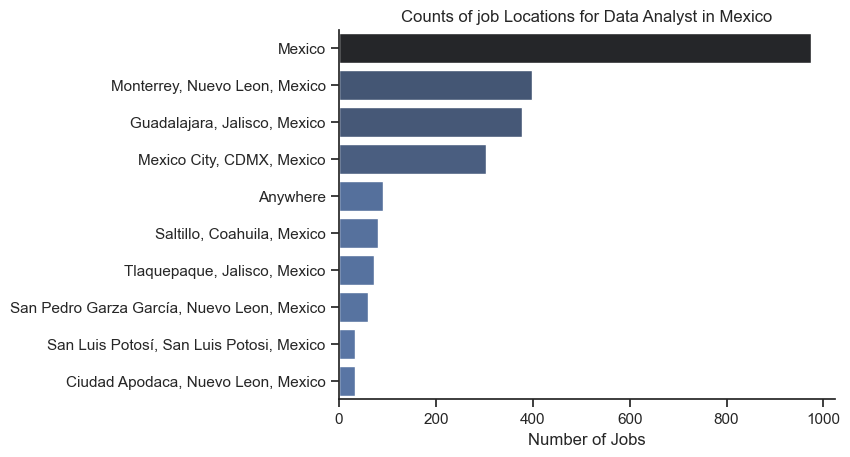

In [52]:
df_plot = df_DA_Mex['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of job Locations for Data Analyst in Mexico')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

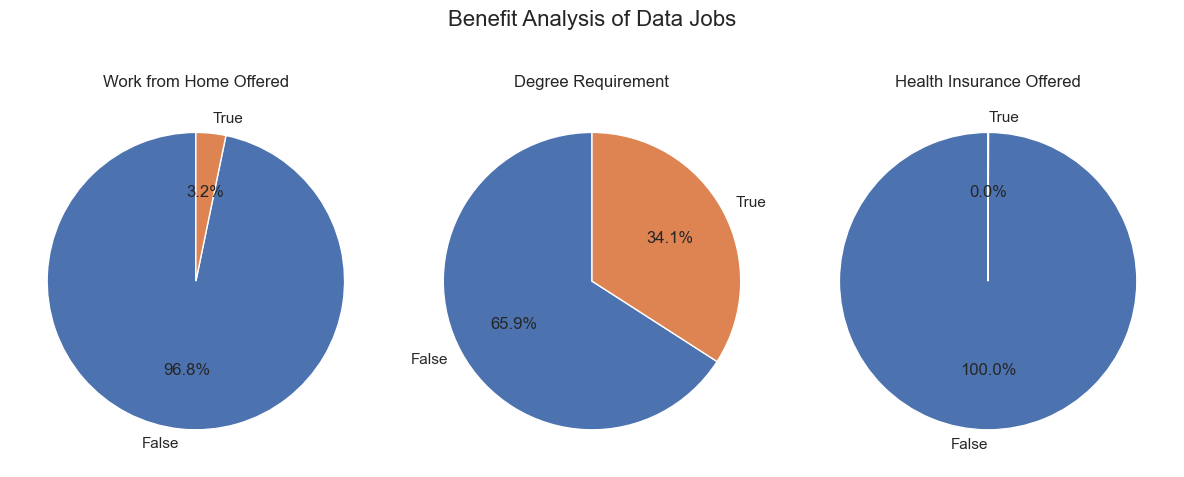

In [61]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_Mex[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

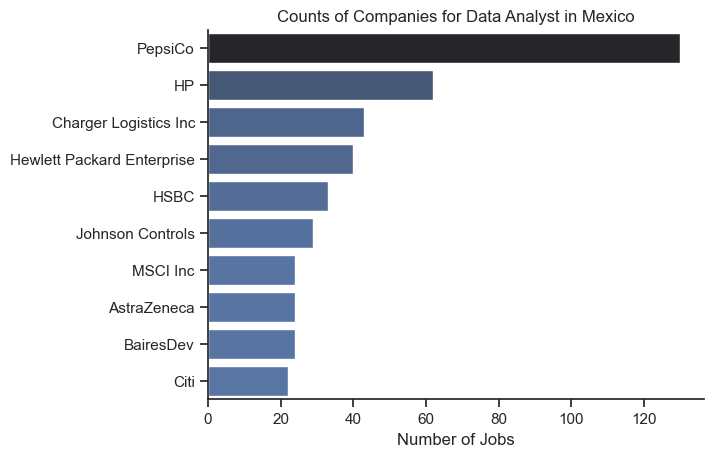

In [62]:
df_plot = df_DA_Mex['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in Mexico')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()